## 1. Load Cleaned Data

In [1]:
import pandas as pd

df = pd.read_csv("../data/clean/cleaned_reviews.csv")
df.head()

,review,rating,date,bank,source
0,really am happy to this app it is Siple to use...,5,2025-06-07,CBE,Google Play
1,I liked this app. But the User interface is ve...,2,2025-06-07,CBE,Google Play
2,"""Why don’t your ATMs support account-to-accoun...",4,2025-06-06,CBE,Google Play
3,what is this app problem???,1,2025-06-05,CBE,Google Play
4,the app is proactive and a good connections.,5,2025-06-05,CBE,Google Play


## 2. Basic Data Overview

In [2]:
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isna().sum())

Shape: (1431, 5)

Data Types:
 review    object
rating     int64
date      object
bank      object
source    object
dtype: object

Missing Values:
 review    0
rating    0
date      0
bank      0
source    0
dtype: int64


## 3. Review Length Stats

In [3]:
df["review_length"] = df["review"].apply(len)
df["review_length"].describe()

count    1431.000000
mean       56.939902
std        87.164794
min         1.000000
25%         8.000000
50%        21.000000
75%        67.000000
max       500.000000
Name: review_length, dtype: float64

## 4. Rating Distribution

/tmp/ipykernel_66965/3116835322.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=df, palette="coolwarm")


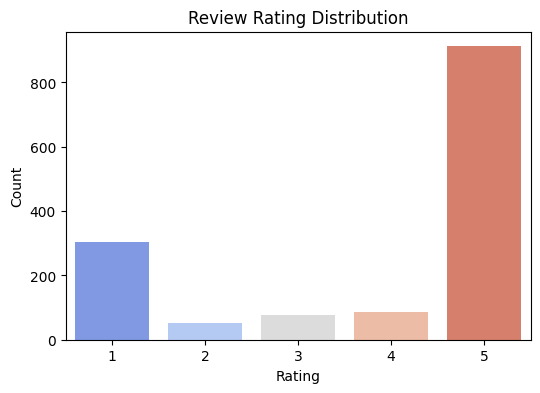

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x="rating", data=df, palette="coolwarm")
plt.title("Review Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

## 5. Reviews by Bank

/tmp/ipykernel_66965/614056706.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="bank", data=df, palette="Set2")


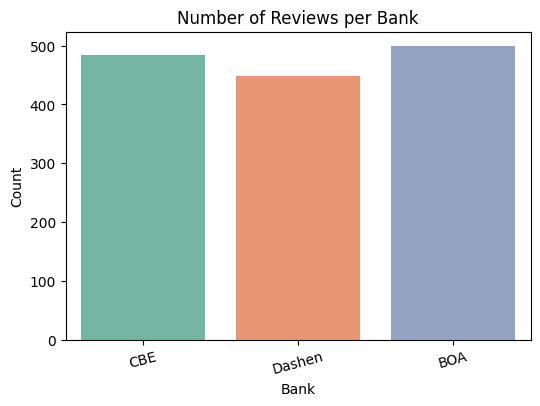

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x="bank", data=df, palette="Set2")
plt.title("Number of Reviews per Bank")
plt.xlabel("Bank")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.show()

## 6. Time Series of Reviews

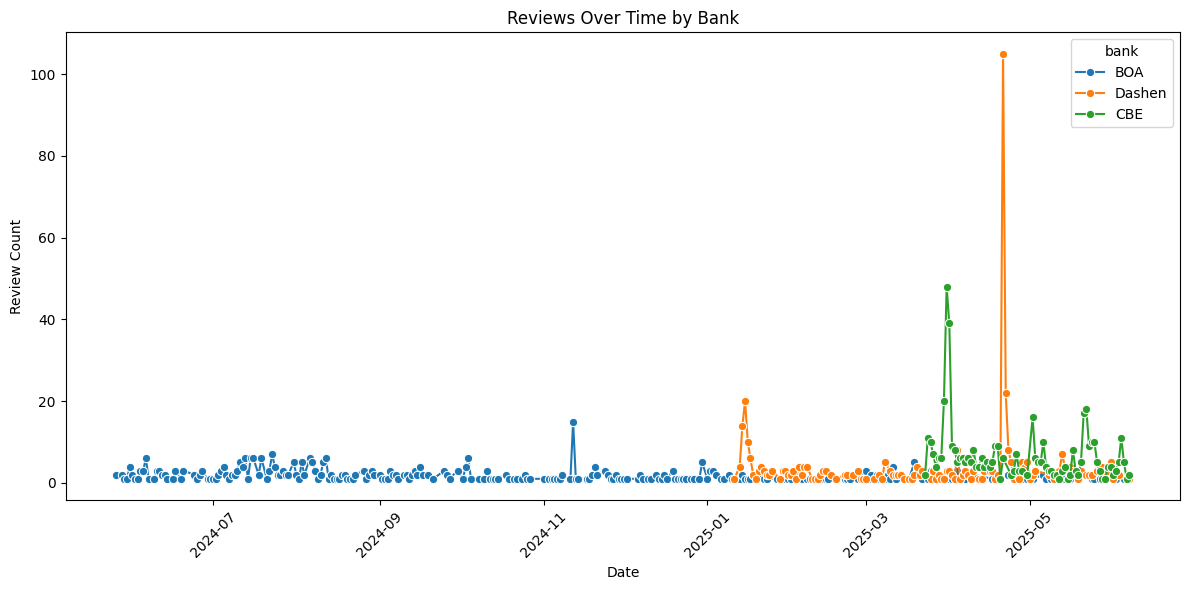

In [6]:
df["date"] = pd.to_datetime(df["date"])
reviews_per_day = df.groupby(["date", "bank"]).size().reset_index(name="count")

plt.figure(figsize=(12, 6))
sns.lineplot(data=reviews_per_day, x="date", y="count", hue="bank", marker="o")
plt.title("Reviews Over Time by Bank")
plt.xlabel("Date")
plt.ylabel("Review Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()